# Ejercicios Pair Programming 
## Lección 2 - Tratamiento para ML de Test Estadísticos

En este ejercicio de pair programming seguiréis usando el dataset que seleccionasteis ayer.

In [5]:
#Librerias

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import skew
from scipy.stats import kurtosistest
from scipy import stats
# Establecer tamaño gráficas
plt.rcParams["figure.figsize"] = (10,10)

# Warning
import warnings
warnings.filterwarnings('ignore')

In [6]:
df = pd.read_csv("supermercado_limpio.csv", index_col=0)

In [7]:
df.head()

,id,year_birth,education,marital_status,income,kidhome,teenhome,dt_customer,recency,numdealspurchases,numwebpurchases,numstorepurchases,numwebvisitsmonth
0,1826,1970,Graduation,Divorced,84835.0,0,0,6/16/2014,0,1,4,6,1
1,1,1961,Graduation,Single,57091.0,0,0,6/15/2014,0,1,7,7,5
2,10476,1958,Graduation,Married,67267.0,0,1,5/13/2014,0,1,3,5,2
3,1386,1967,Graduation,Together,32474.0,1,1,11/5/2014,0,1,1,2,7
4,5371,1989,Graduation,Single,21474.0,1,0,8/4/2014,0,2,3,2,7


¿Qué diferencia existe el error de tipo I y el error de tipo II?


En el error de Tipo I rechazamos la hipotesis nula cuando es verdadera mientras que en el error de tipo II aceptamos la hipótesis nula siendo falsa.

¿Qué es la asimetría?

Es la falta de simetría que presenta una distribución teniendo en cuenta la media. Dicha asimetría puede tener una curva sesgada a la derecha o a la izquierda. Si es positiva la media es mayor que la mediana y la moda, si es negativa la media es menor que la mediana y la moda, y si es simetrica la media sería igual que la mediana y la moda.

¿Es vuestra variable respuesta asimétrica?

In [8]:
# Calculamos la asimetría con el metodo skew de la libreria scipy.stats
skew(df["numwebpurchases"])

0.693340378727926

In [9]:
# Calculamos también la asimetría con el método de pandas skew
df["numwebpurchases"].skew()

0.6938130929100138

Vemos que el valor no es el mismo aunque la diferencia es mínima y en ambos caso la asimetría es positiva.

In [10]:
# Calculamos la media de nuestra variable respuesta
df["numwebpurchases"].mean()

4.072207084468665

In [11]:
# Calculamos la mediana de nuestra variable respuesta
df["numwebpurchases"].median()

4.0

En nuestro caso nuestra variable es asimétrica positiva, es decir la media es mayor que la mediana, por tanto, los datos no son normales ya que la curva es sesgada a la derecha. Hay que tener en cuenta que la media y la mediana están muy cerca por lo que aunque es asimétrica positva es de carácter muy débil.

¿Qué tipo de curtosis presenta vuestra variable respuesta?

In [12]:
kurtosistest(df["numwebpurchases"])

KurtosistestResult(statistic=-2.8694940609797603, pvalue=0.004111290533166566)

Nuestra variable respuesta presenta una grado de concentración leptocurtosis es decir aparece de una forma afilada. También hay que tener en cuenta que está muy cerca de ser mesocurtosis ya que está muy cerca del 0 nuestro valor.

¿Es vuestra variable respuesta normal? Demostrarlo visual y analíticamente.

### Representación Gráfica de la variable respuesta

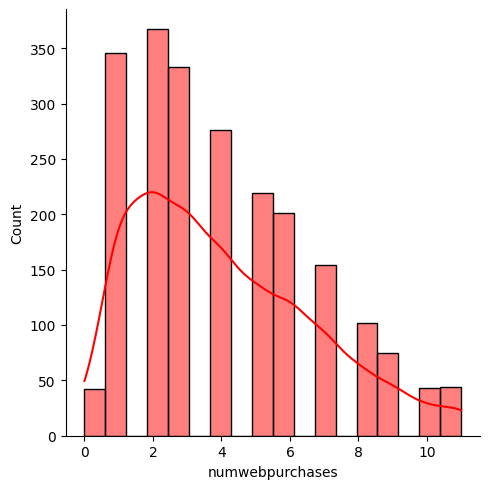

In [13]:
sns.displot(df["numwebpurchases"], kde = True, color = "red");

Podemos apreciar en esta gráfica que nuestra variable respuesta no presenta una distribución normal, es decir, su asimetría es positiva y sesgada a la derecha.

### Test de Normalidad

Partiendo de esta base:

Hipotesis nula = los datos son normales

Hipotesis alternativa = los datos no son normales

In [14]:
# Shapiro

stats.shapiro(df["numwebpurchases"])

ShapiroResult(statistic=0.9306982755661011, pvalue=8.496315181302744e-31)

Al ser el valor de nuestro p-value inferior a 0.05 nos reafirma, con un 95%  que rechazamos la hipotesis nula y aceptamos la hipotesis alternativa, es decir, nuestros datos no son normales.

Happy coding💪🏽